In [5]:
import pandas as pd
import numpy as np
import pathlib as pl
# library used for initial visualization
# library used for initial visualization
import sklearn
import pathlib as pl

In [6]:
# path = '../dataset/finRep/FinancialPhraseBank/all-data.csv'

# df = pd.read_csv(path, encoding = "ISO-8859-1", names = ['sentiment', 'sentence'])
# df

In [7]:
# path = '../dataset/finRep/SEntFiN-v1.1/SEntFiN-v1.1.csv'

# df = pd.read_csv(path, encoding = "ISO-8859-1")
# df

In [8]:
path = '../dev/web_scrapper/sentfin_extended22.csv'

df = pd.read_csv(path, encoding = "ISO-8859-1")
df

,Title,Decisions,links,source,title,body
0,The empire strikes back: Why gold will matter ...,neutral,https://m.economictimes.com/markets/commoditie...,m.economictimes.com,The empire strikes back: Why gold will matter ...,MUMBAI: The year 2013 was a forgettable one fo...
1,Top brokers recommend 'subscribe' to Syngene I...,neutral,https://m.economictimes.com/markets/ipos/fpos/...,m.economictimes.com,Top brokers recommend 'subscribe' to Syngene I...,NEW DELHI: Brokerages are advising long-term i...
2,"Ujjivan Financial Rs 1,500 crore IPO to hit D-...",neutral,https://economictimes.indiatimes.com/markets/i...,economictimes.indiatimes.com,"Ujjivan Financial's Rs 1,500 crore IPO to hit ...",MUMBAI: Ujjivan Financial will be the first mi...
3,UTI AMC shortlists 3 names for Chairman and MD...,neutral,https://m.economictimes.com/uti-amc-shortlists...,m.economictimes.com,UTI AMC shortlists 3 names for Chairman and MD...,"NEW DELHI: UTI AMC, India's oldest asset manag..."
4,"UTI MF appoints Kaeley as group president, sal...",neutral,https://m.economictimes.com/uti-mf-appoints-ka...,m.economictimes.com,"UTI MF appoints Kaeley as group president, sal...",MUMBAI: UTI Mutual Fund has appointed Suraj Ka...
...,...,...,...,...,...,...
1434,"Interim Budget impact: Markets get a boost, ra...",positive,https://economictimes.indiatimes.com/interim-b...,economictimes.indiatimes.com,"Interim Budget impact: Markets get a boost, ra...",NEW DELHI: The good thing about the interim Bu...
1435,Investors should opt for higher exposure to PS...,positive,https://m.economictimes.com/markets/stocks/rec...,m.economictimes.com,Investors should opt for higher exposure to PS...,"In a chat with ET Now, Kunj Bansal, ED & CIO, ..."
1436,IT to find support around 9750-9800 on CNX IT:...,neutral,https://m.economictimes.com/markets/stocks/rec...,m.economictimes.com,IT to find support around 9750-9800 on CNX IT:...,"In a chat with ET Now, Ashwani Gujral, Fund Ma..."
1437,"IVRCL rallies 5% as CDR approves Rs 7,000-cror...",positive,https://m.economictimes.com/markets/stocks/new...,m.economictimes.com,"IVRCL rallies 5% as CDR approves Rs 7,000-cror...",NEW DELHI: IVRCL Ltd rose as much as 4.9 per c...


<AxesSubplot:>

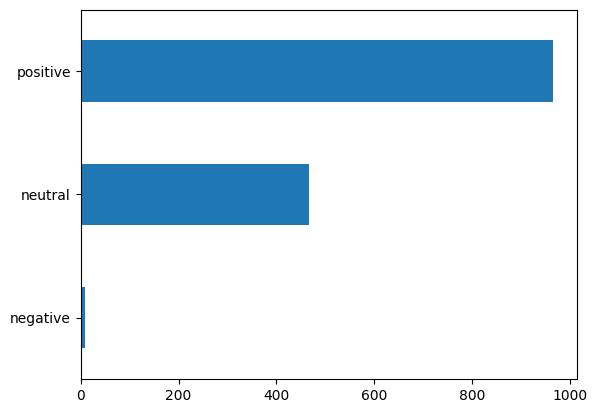

In [9]:
df.Decisions.value_counts().sort_values().plot(kind = 'barh')

In [10]:
# !pip install -U spacy

In [36]:
import re

sample = df.sample(1).iloc[0]
title = sample['Title']
text = sample['body']
sentiment = sample['Decisions']
text = re.sub(r'[^A-Za-z0-9 .,;?!]+', '', text)
text = re.sub(' +', ' ', text)
print('Title: ' ,title)
print(text)
print('Sentiment: ', sentiment)

Title:  Force Motors a multibagger in making, says Daljeet Singh Kohli
In an chat with ET Now, Daljeet Singh Kohli, Head of Research, IndiaNivesh Ltd, talks about the ongoing rally in the stocks of Force Motors. ET Now Force Motorss management commentary per se has been about cautious optimism ahead of the June quarter numbers, It is true that the company is doing work for two premier MNC car makers and that should augur well for it, but what has driven the stellar move that has happened on the counter, up 30 per cent for the week? Is the market preempting an extremely strong quarter? Daljeet Singh Kohli I would say that the upmove has not been exactly due to likely strong quarterly numbers. It is a very goodquality company that is available to you right now and that at no obscene valuations, in case you compare it with say Eicher or MRF or anything. So people are expecting that this company will ultimately be in that league. For example, at Rs 5,000, Bosch used to look like highly ove

SPACY

In [12]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp(text)
print(doc.ents)

(Nirmal Bang, Mercator Lines, Buy Mercator Lines, 58)


RAKE NLTK

In [13]:
from rake_nltk import Rake
rake_nltk_var = Rake()

rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['short term trading perspective keeping', 'mumbai nirmal bang', 'immediate target could', 'huge volumes witnessed', 'buy mercator lines', 'buy mercator lines', 'advised shortterm traders', 'rs 65 70', 'near term', 'rs 58', 'well placed', 'well placed', 'report said', 'moving averages', 'moving averages', 'stoploss', 'stock', 'stock']


TFIDF

In [14]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords as sw

# def train_keyword(data): #SE PUEDE EXTENDER EL DICCIONARIO
# #     # use stopword to filter words    
# #     stop = sw.stopwords_key()
# #     stop = stop.splitlines()
# #     stop = str(stop)
# #     stop = stop.translate(str.maketrans('', '', string.punctuation))
#     stopwords_list = list(sw.words('english'))
# #     stopwords_list.extend(stop.split())
    
#     # vectorizing the words use tf-idf
#     vectorizer = TfidfVectorizer(analyzer='word', stop_words=set(stopwords_list), use_idf=True)
#     vector = vectorizer.fit_transform(data)
    
#     # store to dataframe    
#     df = pd.DataFrame(vector[0].T.todense(), index=vectorizer.get_feature_names(), columns=["vector"])
#     df = df.sort_values('vector', ascending=False)
#     df.reset_index(inplace=True)
#     df = df.rename(columns = {'index':'keywords'})
#     df = df[df['vector'] != 0]

#     return df

In [15]:
# raw_data = [text]
# keywords = train_keyword(raw_data)
# # print top 10 keywords
# print(keywords.head(10))

KEYBERT

In [16]:
# # Install the libraries
# !pip install keybert
# !pip install sentence-transformers
# !pip install keyphrase_vectorizers

In [17]:
# Import them
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
from keyphrase_vectorizers import KeyphraseCountVectorizer

# To show the execution times
# !pip install ipython-autotime
# %load_ext autotime

In [18]:
sent_trans = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
keyBERT_model = KeyBERT(model = sent_trans)

In [19]:
def extract_terms(document, vectorizer, 
                  top_N=7, model=keyBERT_model, diversity_threshold = 0.7):

  keywords = model.extract_keywords(document, stop_words='english', 
                                    vectorizer=vectorizer,
                                    use_mmr=True, 
                                    diversity = diversity_threshold,
                                    top_n = top_N
                                    )
  
  return sorted(keywords, key=lambda tup:(-tup[1], tup[0]))

In [20]:
# print(f'Text: {text}.\nLength: {len(text.split())}')
best_terms = extract_terms(text, vectorizer=KeyphraseCountVectorizer())

for terms_and_score in best_terms:
  print(terms_and_score)

('mercator lines', 0.6118)
('short term trading perspective', 0.4737)
('stock', 0.3586)
('mumbai nirmal bang', 0.2321)
('immediate target', 0.2035)
('stoploss', 0.1796)
('averages', 0.1394)


In [21]:
# !pip install git+https://github.com/LIAAD/yake

In [22]:
import yake

In [23]:
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(text)

for kw in keywords:
	print(kw)

('MUMBAI Nirmal Bang', 0.00047311860053534586)
('buy Mercator Lines', 0.0033369271588951765)
('MUMBAI Nirmal', 0.005586840090708272)
('Nirmal Bang', 0.007054104933620801)
('advised shortterm traders', 0.009785674895518005)
('Mercator Lines', 0.010396966437703244)
('Bang has advised', 0.01752389507303344)
('buy Mercator', 0.02001668705081907)
('moving averages', 0.03988182406056253)
('advised shortterm', 0.044215344563468165)
('shortterm traders', 0.044215344563468165)
('Mercator', 0.06479972902731951)
('MUMBAI', 0.06638227068880072)
('Lines', 0.07858965394513126)
('Nirmal', 0.0836940445522342)
('Bang', 0.0836940445522342)
('averages', 0.11903051085989765)
('traders to buy', 0.13896229596512466)
('buy', 0.14850522634197247)
('stock', 0.15515222850106344)


In [24]:
# language = "en"
# max_ngram_size = 3
# deduplication_threshold = 0.9
# deduplication_algo = 'seqm'
# windowSize = 1
# numOfKeywords = 20

# custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
# keywords = custom_kw_extractor.extract_keywords(text)

# for kw in keywords:
#     print(kw)

In [25]:
# !pip install git+https://github.com/boudinfl/pke.git

In [59]:
import pke

# initialize keyphrase extraction model, here TopicRank
extractor = pke.unsupervised.TopicalPageRank()

# load the content of the document, here document is expected to be a simple 
# test string and preprocessing is carried out using spacy
extractor.load_document(input=text, language='en')

# keyphrase candidate selection, in the case of TopicRank: sequences of nouns
# and adjectives (i.e. `(Noun|Adj)*`)
extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
keyphrases = extractor.get_n_best(n=10)

In [60]:
print(keyphrases)

[('et now force motorss management commentary', 0.09993360884668671), ('likely strong quarterly numbers', 0.08933116644840278), ('june quarter numbers', 0.07127356299330039), ('goodquality company', 0.05776782954682108), ('daljeet singh kohli', 0.05240507348130554), ('few numbers', 0.052146112302135283), ('fivedigit numbers', 0.0510296552002022), ('force motors', 0.050022971010532685), ('company', 0.04759211571607244), ('strong quarter', 0.04171958673221711)]
